**Disclaimer!**: This is not an open source project. As I worked on it I relized it might have potential as a commercial product. Therefore:
**default copyright laws apply, meaning that I retain all rights to my source code and no one may reproduce, distribute, or create derivative works from my work**

Basically, you can use it to make bets for yourself personally, but not as a (paid or free) service to others. 

## Predicting the winner of a UFC bout using fighter statistics

#### Gediyon Yilma
Mixed martial arts (MMA) is a sport that has exploded in popularity in recent years, and one that I follow pretty closely. The UFC is by far the largest MMA promotion in America, and like most major sports franchises the bouts are widely gambled on. I want to see if I can use historical fighter data (fighter age, strikes landed per minute, strikes absorbed per minute, and so on) as well as stats on their opponent, to predict whether that fighter will win a given bout at a higher accuracy than the bookmakers. Of course bookmakers odds are not strictly speaking predictions, they are to be interpreted as the probability that a given fighter wins/loses. Uncharitibly to the bookmakers I'm going to interpret the odds as a prediction-- the favorite is predicted to win. I will uncover the bookmakers success rate, and see if I can find a way to predict the winner that is more accurate. A more accurate way of predicting winners would be helpful to the many sports gamblers out there. Furthermore, odds are calculated based on the publics expectation of who will win (how people are actually betting). Many more people bet during title fights, as there is more media/publicity surrounding the event and hence more awareness. Many people who do not usually bet may bet on a title fight, and skew the odds, perhaps making them less reliable (for example by betting for the fighter who's personality they like). I want to see if the odds for title fights are less reliable as a result of this.

# The data
I will be using two datasets for this analysis. The first is UFC odds data from March 21, 2010 up to March 14, 2020, obtained from Kaggle. The columns are shown below. R_fighter stands for "red fighter," i.e the fighter in the red corner, and B_fighter 
stands for "blue fighter."

In [1]:
import pandas as pd
odds_data = pd.read_csv("data.csv", sep=',')
odds_data.head()

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE


The second dataset is UFC fighter data from 1993 to 2021, also obtained from Kaggle. The columns are shown below.

In [2]:
fighter_data = pd.read_csv("raw_fighter_details.csv", sep=',')
fighter_data

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,Zhang Tiequan,"5' 8""",155 lbs.,"69""",Orthodox,"Jul 25, 1978",1.23,36%,2.14,51%,1.95,58%,75%,3.4
3592,Alex Zuniga,NaN,145 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3593,George Zuniga,"5' 9""",185 lbs.,NaN,NaN,NaN,7.64,38%,5.45,37%,0.00,0%,100%,0.0
3594,Allan Zuniga,"5' 7""",155 lbs.,"70""",Orthodox,"Apr 04, 1992",3.93,52%,1.80,61%,0.00,0%,57%,1.0


## Cleaning the odds dataset
The first thing I want to do is clean the odds dataset for my purposes. I only care who was predicted to win by the odds, and who actually won. I'll keep the fighter names for now as I will need them to combine the odds dataset with the fighter dataset later on. For now I'll drop all columns except R_fighter, B_fighter, R_odds, B_odds, title_bout, and Winner. 

In [3]:
odds_data = odds_data.drop(['date','location','country','weight_class','gender'],axis=1)
odds_data

,R_fighter,B_fighter,R_odds,B_odds,Winner,title_bout
0,Kevin Lee,Charles Oliveira,-145.0,135.0,Blue,False
1,Demian Maia,Gilbert Burns,160.0,-170.0,Blue,False
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,Red,False
3,Johnny Walker,Nikita Krylov,-137.0,127.0,Blue,False
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,Red,False
...,...,...,...,...,...,...
5523,NaN,NaN,NaN,NaN,NaN,NaN
5524,NaN,NaN,NaN,NaN,NaN,NaN
5525,NaN,NaN,NaN,NaN,NaN,NaN
5526,NaN,NaN,NaN,NaN,NaN,NaN


Then I will add two new columns, "R_won" which will equal 1 if the red fighter won and 0 otherwise, and "R_pred" which will equal 1 if the red fighter was predicted to win, and 0 otherwise. I will also convert title_bout to 0 and 1 (for false and true), and add a column to indicate if the odds were right, "pred_correct", 1 if its correct and 0 otherwise.

In [4]:
import numpy as np
# first I want to drop all rows containing Nan
odds_data = odds_data.dropna()
odds_data = odds_data.reset_index(drop=True)
# Second I will convert the title bout information to 0s and 1s, and apply that to the dataframe
def make_bool(x):
    return 1*x
odds_data['title_bout'] = odds_data['title_bout'].apply(make_bool)



# Then I will make some lists for my new columns.
r_pred = list()
r_won = list()

# And then iterate through the dataframe populating the two lists
for x in odds_data.iterrows():
#     For each row, I obtain the odds for red and blue, and the winner
    r_odds = x[1].values[2]
    b_odds = x[1].values[3]
    winner = x[1].values[4]
#     append a 1 if red was the favorite, 0 otherwise
    if r_odds < b_odds:
        r_pred.append(1)
    else:
        r_pred.append(0)
#         append a 1 if red was the winner, 0 otherwise
    if winner=="Red":
        r_won.append(1)
    else:
        r_won.append(0)
   
# add my now populated lists as columns to the dataframe.
odds_data['R_pred'] = r_pred
odds_data['R_won'] = r_won

# Finally, I will add a new column 'pred_correct' by taking the logical and of R_pred and R_won
odds_data['pred_correct'] = odds_data['R_won'] & odds_data['R_pred']

# Lets take a look at the first couple of rows
odds_data


,R_fighter,B_fighter,R_odds,B_odds,Winner,title_bout,R_pred,R_won,pred_correct
0,Kevin Lee,Charles Oliveira,-145.0,135.0,Blue,0,1,0,0
1,Demian Maia,Gilbert Burns,160.0,-170.0,Blue,0,0,0,0
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,Red,0,1,1,1
3,Johnny Walker,Nikita Krylov,-137.0,127.0,Blue,0,1,0,0
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,Red,0,1,1,1
...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,Blue,0,1,0,0
4236,John Howard,Daniel Roberts,-210.0,175.0,Red,0,1,1,1
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,Red,0,1,1,1
4238,Mike Pierce,Julio Paulino,-420.0,335.0,Red,0,1,1,1


## Exploratory analysis
Now lets do some exploratory analysis! I want to find out how good the official odds are at predicting the winner of a bout. To do this, I will simply get the normalized value counts for pred_correct

In [5]:
odds_data['pred_correct'].value_counts(normalize=True)

0    0.575236
1    0.424764
Name: pred_correct, dtype: float64

So as we can see, the bookies aren't great-- at least from March 21, 2010 to March 14, 2020. Around 57% of the time, the official underdog won. This seems to indicate that relying on the official odds will get you results worse than chance. But I don't think this is the whole story. Often fights have very close odds (pick ems), and being a favorite in that situation may not be very predictive. But what if a fighter is a heavy favorite? I have a hunch the odds will be more reliable the more skewed in one fighter's favor they are, lets see if thats true.

I'm going to approach this by defining 'skewed odds' as a fight in which the odds differential between the two fighters is >= 500. This tells us that one of the fighters is a heavy favorite. Then I will add a new column, 'mismatch' which is 1 if one fighter is heavily favored by this criteria, and 0 otherwise. I will then see if the odds predict better when there is a mismatch. Additionally, I will test my intial prediction that the odds are less reliable for title fights.

In [6]:
mismatch = list()
for x in odds_data.iterrows():
#     For each row, I obtain the odds for red and blue
    r_odds = x[1].values[2]
    b_odds = x[1].values[3]
    diff = abs(r_odds-b_odds)
#     append a 1 if odds differentilal > = 500, 0 otherwise
    if diff>=500:
        mismatch.append(1)
    else:
        mismatch.append(0)
odds_data['mismatch'] = mismatch
odds_data

,R_fighter,B_fighter,R_odds,B_odds,Winner,title_bout,R_pred,R_won,pred_correct,mismatch
0,Kevin Lee,Charles Oliveira,-145.0,135.0,Blue,0,1,0,0,0
1,Demian Maia,Gilbert Burns,160.0,-170.0,Blue,0,0,0,0,0
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,Red,0,1,1,1,1
3,Johnny Walker,Nikita Krylov,-137.0,127.0,Blue,0,1,0,0,0
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,Red,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,Blue,0,1,0,0,0
4236,John Howard,Daniel Roberts,-210.0,175.0,Red,0,1,1,1,0
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,Red,0,1,1,1,0
4238,Mike Pierce,Julio Paulino,-420.0,335.0,Red,0,1,1,1,1


To get a visual sense of the data, I will make a stacked barchart of normalized correct predictions when the bout is a title bout, and correct predictions when it is not. 
### Interpretation
The first bar shows the proportions of correct predictions when it is not a title bout. Orange indicates a correct prediction, and blue an incorrect one. As we can see the blue part is larger, indicating that when it is not a title bout the odds will predict incorrectly most of the time. In the second bar, we can see the orange part is larger, indicating that when it is a title bout, the odds will predict correctly most of the time. This is contrary to my initial prediction.

<AxesSubplot:xlabel='title_bout'>

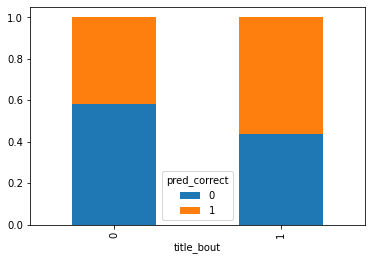

In [7]:
pd.crosstab(odds_data['title_bout'],odds_data['pred_correct'],normalize='index').plot.bar(stacked=True)

We can also look at the proportions numerically. Below, we can see that, for title bouts, the odds predict the winner correctly 56% of the time, and predict incorrectly 44% of the time. For non-title bouts the odds are reliable 42% of the time and unreliable 58% of the time.

In [8]:
pd.crosstab(odds_data['title_bout'],odds_data['pred_correct'],normalize='index')

pred_correct,0,1
title_bout,,
0,0.582464,0.417536
1,0.439252,0.560748


We can do the same analysis for mismatches. We can see below that the odds are far more reliable when there is a mismatch (one fighter is heavily favored) versus when the odds are more even.

<AxesSubplot:xlabel='mismatch'>

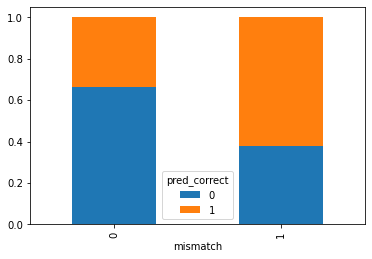

In [9]:
pd.crosstab(odds_data['mismatch'],odds_data['pred_correct'],normalize='index').plot.bar(stacked=True)

Again, performing a numerical analysis, we see below that for mismatches the odds are reliable 62% of the time, and unreliable 38% of the time. For non-mismatches the odds are 66% unreliable, 34% reliable.

In [10]:
pd.crosstab(odds_data['mismatch'],odds_data['pred_correct'],normalize='index')

pred_correct,0,1
mismatch,,
0,0.664603,0.335397
1,0.380345,0.619655


## Prediction target
The highest reliablity for the official odds comes when there is a mismatch (62% accurate prediction of who wins), which isn't too bad, a lot better than a coin flip. I don't want to give the bookies too much credit here, however. A mismatch is, in my opinion, a bout where the winner could also probably be predicted by a dedicated fan of the sport (I don't have the data to back this up, but as a fan myself I like to think I'm pretty good at predicting winners, especially if there is a mismatch). So as my goal for the rest of this tutorial, I will try to use the fighter statistics from the second dataset, along with machine learning, to predict the winner of a given bout with an accuracy better than 62% (for all bouts, not just mismatches and title fights). If I succeed, feel free to use my code to place bets on UFC fights and make some money (disclaimer: gamble at your own risk, familiarize yourself with local gambling laws, read up on betting strategies, i.e don't put all your bets on one fight).

## Cleaning the fighter stats dataset
For the fighter stat dataset I am going to keep the name column, so that I can match stats with odds data. I will drop rows containing NaN, convert stance data (southpaw, othodox, switch, open stance) into dummy variables, convert height into inches, and date of birth to just year of birth. I will drop the weight column since fights are by weight class (in any given bout two fighters will have the same weight, so it won't have any predictive value on who wins).

In [11]:
# first I will drop all NA coulumns, as well as weight
fighter_data = fighter_data.dropna().drop('Weight',axis=1)
fighter_data.head()

,fighter_name,Height,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2,Shamil Abdurakhimov,"6' 3""","76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
6,Daichi Abe,"5' 11""","71""",Orthodox,"Nov 27, 1991",3.80,33%,4.49,56%,0.33,50%,0%,0.0
8,Klidson Abreu,"6' 0""","74""",Orthodox,"Dec 24, 1992",2.05,40%,2.90,55%,0.64,20%,80%,0.0
11,Juan Adams,"6' 5""","80""",Orthodox,"Jan 16, 1992",7.09,55%,4.06,34%,0.91,66%,57%,0.0
12,Anthony Adams,"6' 1""","76""",Orthodox,"Jan 13, 1988",3.17,41%,5.93,44%,0.00,0%,0%,0.0


In [12]:
# Then I will define some functions to convert columns into more manageable form. I will define functions to convert
# height to inches, strip the """ symbol from reach entries, convert DOB to only year of birth, and strip the "%" symbol
# from any entries that contain it.

def feet_to_inches(string):
    string = string.split("'")
    string[1] = string[1].split("\"")[0]
    feet = string[0]
    inches = string[1]
    tot_inches = int(feet)*12 + int(inches)
    return tot_inches

def strip_quotes(string):
    string = string.split("\"")
    return int(string[0])
    
def strip_percent(string):
    string = string.split("%")
    string = int(string[0])/100
    return string

def extract_YOB(string):
    string = int(string.split(",")[1])
    return string

# Then I apply the functions to the dataset
fighter_data['Height'] = fighter_data['Height'].apply(feet_to_inches)
fighter_data['Reach'] = fighter_data['Reach'].apply(strip_quotes)
fighter_data['Str_Acc'] = fighter_data['Str_Acc'].apply(strip_percent)
fighter_data['Str_Def'] = fighter_data['Str_Def'].apply(strip_percent)
fighter_data['TD_Acc'] = fighter_data['TD_Acc'].apply(strip_percent)
fighter_data['TD_Def'] = fighter_data['TD_Def'].apply(strip_percent)
fighter_data['DOB'] = fighter_data['DOB'].apply(extract_YOB)

# And finally get dummy variables for the stance data, dropping first to avoid the dummy trap, and then drop the stance
# column
fighter_data = pd.concat((fighter_data, pd.get_dummies(fighter_data['Stance'],drop_first=True)), axis=1)
fighter_data = fighter_data.drop('Stance',axis=1)

fighter_data = fighter_data.reset_index(drop=True)
# And take a look at the first few entries
fighter_data.head()

,fighter_name,Height,Reach,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Orthodox,Southpaw,Switch
0,Shamil Abdurakhimov,75,76,1981,2.45,0.44,2.45,0.58,1.23,0.24,0.47,0.2,1,0,0
1,Daichi Abe,71,71,1991,3.80,0.33,4.49,0.56,0.33,0.50,0.00,0.0,1,0,0
2,Klidson Abreu,72,74,1992,2.05,0.40,2.90,0.55,0.64,0.20,0.80,0.0,1,0,0
3,Juan Adams,77,80,1992,7.09,0.55,4.06,0.34,0.91,0.66,0.57,0.0,1,0,0
4,Anthony Adams,73,76,1988,3.17,0.41,5.93,0.44,0.00,0.00,0.00,0.0,1,0,0


So far so good. All the columns in the fighter dataset are numerical (except name, which I am going to use to combine the two datasets)

## Combining the datasets

My approach for combining odds data and fighter data is as follows: For each fighter name in the fighter data set, I will search for a row in the odds dataset where the name of either the red fighter or the blue fighter matches. Then I will add cells to that row for the fighter data, i.e R_height, R_DOB, etc. Once I am done, I will remove rows where data is missing for either fighter. I will then remove the name columns, odds columns, winner column, title_bout column, pred_correct, R_pred, and mismatch columns from the combined dataset. This will leave me with a dataset where each row contains the fighter stats for the red fighter, the fighter stats for the blue fighter, and whether or not the red fighter won the bout. I can then run my classification algorithm on this dataset, and see if I can predict who wins with greater than 62% accuracy.

Lets get started!

In [13]:
# First of all, I want to remove rows in the odds table that do not have a matching entry in the fighter table for either
# the red or the blue fighter. 

for index, row in odds_data.iterrows():
    r_fighter = row["R_fighter"]
    b_fighter = row["B_fighter"]
    search_red = fighter_data.loc[(fighter_data['fighter_name'] == r_fighter)]
    search_blue = fighter_data.loc[(fighter_data['fighter_name'] == b_fighter)]
    if search_red.empty and search_blue.empty:
        odds_data = odds_data.drop(index, inplace=False)
odds_data = odds_data.reset_index(drop=True)       

In [14]:
# Now lets print out some of the odds data frame to see how many entries we discarded. Recall that the original odds dataset
# had 4239 entries.

odds_data

,R_fighter,B_fighter,R_odds,B_odds,Winner,title_bout,R_pred,R_won,pred_correct,mismatch
0,Kevin Lee,Charles Oliveira,-145.0,135.0,Blue,0,1,0,0,0
1,Demian Maia,Gilbert Burns,160.0,-170.0,Blue,0,0,0,0,0
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,Red,0,1,1,1,1
3,Johnny Walker,Nikita Krylov,-137.0,127.0,Blue,0,1,0,0,0
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,Red,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4209,Duane Ludwig,Darren Elkins,-155.0,135.0,Blue,0,1,0,0,0
4210,John Howard,Daniel Roberts,-210.0,175.0,Red,0,1,1,1,0
4211,Brendan Schaub,Chase Gormley,-260.0,220.0,Red,0,1,1,1,0
4212,Mike Pierce,Julio Paulino,-420.0,335.0,Red,0,1,1,1,1


Great, we can see that we only lost 26 entries, which is insignificant given the size of the dataset. Now I will iterate 
through the fighter stats dataset, and append the stats for each fighter to the corresponding row in the odds dataset.

In [15]:


# As before I'll make lists to hold the soon to be added columns. I'll make a dictionary to hold the new lists.

# keys is a list of all the column names in the fighter stats dataset, except for name
keys = [x for x in fighter_data.keys() if x != "fighter_name"]

# this dictionary will hold the columns to be added to the odds dataset
stat_dict = dict()

# Then I'll iterate through the odds dataset creating my combined dataset.
for index, row in odds_data.iterrows():
#     first I get the names of the red and blue fighters from the odds dataset
    r_fighter = row["R_fighter"]
    b_fighter = row["B_fighter"]
    
#     then i locate the rows in the fighter stats dataset for the red and blue fighter
    search_red = fighter_data.loc[(fighter_data['fighter_name'] == r_fighter)]
    search_blue = fighter_data.loc[(fighter_data['fighter_name'] == b_fighter)]
    
#     then i iterate through the column names of the fighter stats dataset
    for x in keys:
#         i create a new column name by concatenating "r_" to the column name for red fighter, "b_" for blue fighter
        new_key_red = "r_"+x
        new_key_blue = "b_"+x        

        #    if the newly created red key doesn't exist in the dictionary yet, I add it and make it point to an empty list
        if new_key_red not in stat_dict.keys():
            stat_dict[new_key_red] = list()
# if the cell for a specific red fighter stat exists then i add that entry to its appropriate list in the dictionary 
        if len(search_red[x]>0):
            stat_dict[new_key_red].append(search_red[x].item())
#             if that cell is missing/empty string i add NaN to the appropriate list in the dictionary
        else:
            stat_dict[new_key_red].append(np.nan)

            #      I follow the same pattern for the blue fighter stats
        if new_key_blue not in stat_dict.keys():
            stat_dict[new_key_blue] = list()
        if len(search_blue[x]>0):
            stat_dict[new_key_blue].append(search_blue[x].item())
        else:
            stat_dict[new_key_blue].append(np.nan)


In [16]:
# Now that we have our dictionary we can add the extra columns to the odds dataset

for x in stat_dict.keys():
    odds_data[x] = stat_dict[x]

In [17]:
# Lets now drop columns we don't need, as well as drop NaN values. I'll keep the fighter names for a little bit.
odds_data = odds_data.drop(["R_odds","B_odds","Winner","title_bout","R_pred","pred_correct","mismatch"], axis=1)
odds_data = odds_data.dropna()
odds_data = odds_data.reset_index(drop=True)
odds_data

,R_fighter,B_fighter,R_won,r_Height,b_Height,r_Reach,b_Reach,r_DOB,b_DOB,r_SLpM,...,r_TD_Def,b_TD_Def,r_Sub_Avg,b_Sub_Avg,r_Orthodox,b_Orthodox,r_Southpaw,b_Southpaw,r_Switch,b_Switch
0,Kevin Lee,Charles Oliveira,0,69.0,70.0,77.0,74.0,1992.0,1989.0,3.90,...,0.75,0.57,0.8,2.8,1.0,1.0,0.0,0.0,0.0,0.0
1,Demian Maia,Gilbert Burns,0,73.0,70.0,72.0,71.0,1977.0,1986.0,1.82,...,0.61,0.50,1.0,0.7,0.0,1.0,1.0,0.0,0.0,0.0
2,Renato Moicano,Damir Hadzovic,1,71.0,69.0,72.0,70.0,1989.0,1986.0,5.40,...,0.78,0.39,0.6,0.2,1.0,1.0,0.0,0.0,0.0,0.0
3,Johnny Walker,Nikita Krylov,0,78.0,75.0,82.0,77.0,1992.0,1992.0,4.41,...,0.60,0.55,1.2,1.3,1.0,1.0,0.0,0.0,0.0,0.0
4,Francisco Trinaldo,John Makdessi,1,69.0,68.0,70.0,68.0,1978.0,1985.0,3.11,...,0.61,0.88,0.6,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,Clay Guida,Shannon Gugerty,1,67.0,70.0,70.0,71.0,1981.0,1981.0,2.44,...,0.68,0.50,0.7,3.4,1.0,1.0,0.0,0.0,0.0,0.0
3623,Eliot Marshall,Vladimir Matyushenko,0,74.0,72.0,77.0,74.0,1980.0,1971.0,1.93,...,0.79,0.70,0.9,0.1,1.0,1.0,0.0,0.0,0.0,0.0
3624,Duane Ludwig,Darren Elkins,0,70.0,70.0,70.0,71.0,1978.0,1984.0,4.62,...,0.59,0.58,0.1,1.2,1.0,1.0,0.0,0.0,0.0,0.0
3625,John Howard,Daniel Roberts,1,67.0,70.0,72.0,74.0,1983.0,1980.0,2.15,...,0.53,0.40,0.4,2.5,1.0,0.0,0.0,1.0,0.0,0.0


Awesome. It appears we still have a good amount of data even after dropping NaN (3627 rows). As a final sanity check before dropping the fighter names, I will search TD_Def in the fighter stats dataset for the first red fighter and the last red fighter in our combined dataset, and see if those match up.

In [18]:
print(fighter_data.loc[(fighter_data['fighter_name'] == "Kevin Lee")]["TD_Def"])
print(fighter_data.loc[(fighter_data['fighter_name'] == "Eric Schafer")]["TD_Def"])

825    0.75
Name: TD_Def, dtype: float64
1351    0.5
Name: TD_Def, dtype: float64


Excellent. We can see that Kevin Lee, the first red fighter in the combined data set has r_TD_Def = 0.75 and Eric Schafer, the last red fighter in our combined dataset, has r_TD_Def of 0.5. These match the values I printed above from searching those names in the fighter stats dataset, so I am pretty confident I have constructed my combined dataset correctly. Now we can drop the fighter names from the combined dataset, and get to predicting.

In [19]:
odds_data = odds_data.drop(["R_fighter","B_fighter"], axis=1)
odds_data

,R_won,r_Height,b_Height,r_Reach,b_Reach,r_DOB,b_DOB,r_SLpM,b_SLpM,r_Str_Acc,...,r_TD_Def,b_TD_Def,r_Sub_Avg,b_Sub_Avg,r_Orthodox,b_Orthodox,r_Southpaw,b_Southpaw,r_Switch,b_Switch
0,0,69.0,70.0,77.0,74.0,1992.0,1989.0,3.90,3.22,0.42,...,0.75,0.57,0.8,2.8,1.0,1.0,0.0,0.0,0.0,0.0
1,0,73.0,70.0,72.0,71.0,1977.0,1986.0,1.82,3.22,0.43,...,0.61,0.50,1.0,0.7,0.0,1.0,1.0,0.0,0.0,0.0
2,1,71.0,69.0,72.0,70.0,1989.0,1986.0,5.40,2.99,0.46,...,0.78,0.39,0.6,0.2,1.0,1.0,0.0,0.0,0.0,0.0
3,0,78.0,75.0,82.0,77.0,1992.0,1992.0,4.41,4.33,0.72,...,0.60,0.55,1.2,1.3,1.0,1.0,0.0,0.0,0.0,0.0
4,1,69.0,68.0,70.0,68.0,1978.0,1985.0,3.11,5.36,0.44,...,0.61,0.88,0.6,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,1,67.0,70.0,70.0,71.0,1981.0,1981.0,2.44,1.25,0.34,...,0.68,0.50,0.7,3.4,1.0,1.0,0.0,0.0,0.0,0.0
3623,0,74.0,72.0,77.0,74.0,1980.0,1971.0,1.93,1.90,0.27,...,0.79,0.70,0.9,0.1,1.0,1.0,0.0,0.0,0.0,0.0
3624,0,70.0,70.0,70.0,71.0,1978.0,1984.0,4.62,3.50,0.44,...,0.59,0.58,0.1,1.2,1.0,1.0,0.0,0.0,0.0,0.0
3625,1,67.0,70.0,72.0,74.0,1983.0,1980.0,2.15,0.73,0.50,...,0.53,0.40,0.4,2.5,1.0,0.0,0.0,1.0,0.0,0.0


## Machine Learning
My goal is to predict the dependent variable (R_won), based on the independent variables (striking accuracy, etc) for both red and blue fighters, at a higher than 62% accuracy. In regular English, I want to see if I can use fighter stats to predict who wins a given bout better than the bookies. 

This is a classification problem, R_won takes on binary values (0 or 1), so I will be using random forests to do the machine learning part.

In [20]:
# Ok lets get started. First I'll separate my dependent and independent variables.
y = odds_data["R_won"]
x = odds_data.drop(["R_won"],axis=1)

In [21]:
# Next lets create training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,random_state=101,stratify=y,test_size=0.25)

In [22]:
# Lets train our random forest now, and check its accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

r_forest = RandomForestClassifier(random_state=10)
r_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [23]:
# Now the moment of truth! Lets see if our random forest beats the bookies
res_pred = r_forest.predict(x_valid)
accuracy_score(y_valid,res_pred)

0.6041896361631753

Ok, the accuracy is less than 62%, which was our prediction target. Recall however that our 62% benchmark is the accuracy of bookmaker odds when one fighter is a heavy favorite, and note that our classifier performs *significantly* better than the bookmakers odds for fights where there isn't an obvious favorite (33% vs 60%), better for title bouts (56% vs 60%), and better for bouts of all kinds (42% vs 60%). 

I still want to get that 2% though (and maybe more), so lets see if we can optimize the hyper parameters of our classification model to get a more accurate prediction.

In [24]:
# The first hyperparameter I will tweak is max depth.
max_depth = 0
accuracy = 0
for i in range(1,100):
    r_forest = RandomForestClassifier(random_state=10,max_depth=i)
    r_forest.fit(x_train,y_train)
    res_pred = r_forest.predict(x_valid)
    if accuracy_score(y_valid,res_pred) > accuracy:
        accuracy = accuracy_score(y_valid,res_pred)
        max_depth = i
print({"max_depth":max_depth,"accuracy":accuracy})

{'max_depth': 9, 'accuracy': 0.6350606394707828}


Looking at the values printed above, max depth of 9 is associated with the greatest accuracy (63.5%), for max_depths between 1 and 100. We're off to the races! I will take this value as my optimum, and tweak n_estimators (number of trees in the forest) next. The default is 100, I will test values between 1-100.

In [25]:

max_estimators = 1
accuracy = 0.635
for i in range(1,101):
    r_forest = RandomForestClassifier(random_state=10,max_depth=9,n_estimators=i)
    r_forest.fit(x_train,y_train)
    res_pred = r_forest.predict(x_valid)
    if accuracy_score(y_valid,res_pred) > accuracy:
        accuracy = accuracy_score(y_valid,res_pred)
        max_estimators = i
print({"max_estimators":max_estimators,"accuracy":accuracy})

{'max_estimators': 83, 'accuracy': 0.6416758544652701}


## Conclusion
My machine learning model predicts all fight winners with 64.17% accuracy. This is better than official odds for title fights (56%), non-title fights (42%), fights in which there is a heavy favorite (62%), and fights in which there isn't a heavy favorite (a dismal 33.5%!).

Using my model and some strategy, a smart gambler could make some money betting on fights. For example, if there are ten fights on a card where the odds are fairly even, but my model predicts that the underdog will win for each of the ten, and you have ten dollars to bet on each fight (so you have a hundered dollars total), you can calculate the expected payout from following my model as follows (for simplicity, assume each underdog is a +125 underdog. What this means is betting \\$100 will get you \\$125 if they win, so betting \\$10 will get you \\$12.50, for a total payout of \\$22.50. Lets assume the favorite is a -155 favorite. This means betting \\$10 will get you \\$6.67, for a total payout of \\$16.67. For more explanation on how gambling odds work see the links at the end of this tutorial):

In [26]:
# Total payout using official odds to choose all our bets (betting on the favorite). for each bet you have a 33.5% chance
# of winning $16.67 aand a 76.5% chance of losing $10.

total_payout = 0
for i in range(0,10):
    payout = (0.335*16.67)
    total_payout = total_payout + payout
total_payout

55.844500000000025

Terrible! Remember your starting pot was \\$100, so you just lost \\$45. Now lets see how much you would win with the power of machine learning.

In [27]:
# Total payout using my model to choose all our bets (betting on the underdog). for each bet you have a 64.17% chance
# of winning $22.50 aand a 35.83% chance of losing $10.

total_payout = 0
for i in range(0,10):
    payout = (0.6417*22.5)
    total_payout = total_payout + payout
total_payout

144.38250000000002

Will you look at that. You just won \\$44! 

Using this model, the optimal strategy would be to place bets on fights where the odds are very close, but the model predicts that the official underdog should win. You would expect to place a winning bet 64.17% of the time using this strategy, which is pretty great.

In summary, I think my analysis so far is a good application of machine learning to a real world problem. Feel free to use this code to place wagers on UFC fights, but please refer to applicable laws in your area, gamble responsibly, seek help if you feel you may have a gambling addiction, and remember that I accept no liability for any losses you may incur-- my model is accurate *in the aggregate* but anything can happen in a fight, this is up to the MMA gods.


### Useful links

[online betting odds/payout calculator](https://www.actionnetwork.com/betting-calculators/betting-odds-calculator)

[UFC betting odds explained](https://www.oddsshark.com/ufc/betting-odds-explained)

[Machine learning for the complete novice](https://becominghuman.ai/machine-learning-for-dummies-explained-in-2-mins-e83fbc55ac6d)

[Gambling laws by state](https://www.findlaw.com/state/gambling-and-lotteries-laws/gambling.html)
